In [49]:
import numpy as np
from itertools import combinations
from numpy import random
import math
import matplotlib.pyplot as plt

In [50]:
# return a list of all size k subset of [n]
def get_coord(n, k):
    temp = [i +1 for i in range(n)]
    return list(combinations(temp, k))

def idx_coord(V):
    return {k: v for v, k in enumerate(V)}

# generate cov matrix 
# n is number of vertices 
# vals[i] is the covariance of S, S' when intersection is of size i (e.g. we should have vals 0, 1, 2, 3)
def cov_mat(n, k, vals):
    coordinate = get_coord(n, k)
    l_c = len(coordinate)
    cov_mat = np.zeros((l_c, l_c))
    for i in range(l_c):
        cov_mat[i][i] = vals[k]
        for j in range(i):
            size_inter = len(set(coordinate[i]).intersection(coordinate[j]))
            cov_mat[i][j] = vals[size_inter]
            cov_mat[j][i] = vals[size_inter]
    return cov_mat
    
def check_psd(M):
    try:
        np.linalg.cholesky(M)
        return True
    except np.linalg.LinAlgError:
            return False

def sample_gaussain(mean, M):
    return random.multivariate_normal(mean, M)

def round(x):
    return [c >= 1/2 for c in x]

# get adj matrices from sampled triangles
# x is the sample, V is the index of subsets, n is the number of vertices 
# x and V should have length (n choose 3)
def get_graph(x, V, n):
    res = np.zeros((n, n))
    for i in range(len(V)):
        if x[i] == 1:
            cur = V[i]
            for (p, q) in list(combinations(cur, 2)):
                res[p - 1][q - 1] = 1
                res[q - 1][p - 1] = 1
    return res

def get_mean_var(vals, n):
#     means = vals[-1] * np.ones(n)
    # get covariance
    vals -= vals[-1] ** 2
    return vals

In [3]:
# test the covariance matrix put right values based on size of intersection
def test_cov(M, V, vals, i, j):
    print(V[i], V[j])
    size_int = len([a for a in V[i] if a in V[j]])
    print(M[i][j] == vals[size_int])

In [4]:
# set parameter

n = 10
k = 3
p = .5

# get list of all size k subsets
V = get_coord(n, k)

# writedown list of moments vals[i] is E[S,S'] when |S \cap S'| = i
vals = np.array([p**6, p**6, p**5, p**3])

means = vals[-1] * np.ones(len(V))
# get covariance
vals -= vals[-1] ** 2

cov = cov_mat(n, k, vals)
# check covariance is psd
check_psd(cov)

True

In [5]:
test_cov(cov, V, vals, 0, 1)

(1, 2, 3) (1, 2, 4)
True


In [6]:
samples = sample_gaussain(means, cov)

In [7]:
adj = get_graph(round(samples), V, n)

In [12]:
p = 2
s = 2

m = p**s
N = int(3 * m **3 *(m**3 - 1) * (m ** 2 - 1) / p**7)


In [8]:
print(N)

1417


In [9]:
math.comb(N - 1, 3)

472191160

In [13]:
# p = 2 
# s = 3

m = p**s
N = int(3 * m **3 *(m**3 - 1) * (m ** 2 - 1) / p**7)
# print(N)

# V = get_coord(N, 3)

# prob of intersection size 3 -> triangle
p3 = 2 * p **7 /((N - 1)* (N - 2)) 
p2 = p ** 2 * (p ** 2 - 1) * p ** 5/ math.comb(N - 1, 3)
p1 = p ** 7 * (p ** 7 - 2 * p **2 + 1)/ (2 * math.comb(N - 1, 4))
p0 = p3 ** 2

vals = np.array([p0, p1, p2, p3])

print(vals)


[1.63245247e-08 4.64264334e-08 8.13229964e-07 1.27767463e-04]


In [14]:
variance = get_mean_var(vals, math.comb(N, 3))

In [15]:
print(variance)

[0.00000000e+00 3.01019088e-08 7.96905439e-07 1.27751139e-04]


In [ ]:
cov = cov_mat(N, 3, variance)

In [34]:
p = 1.2
s = 3.5

# Take away prime, test higher order terms 
N = int(p ** (8 * s - 7) - p**(6 * s - 7))
p3 = 2 * p ** 3 / N ** 2
p2 = 6 * p ** 9 / N ** 3
p1 = (6 * p ** 14)/ N ** 4
p0 = p3 ** 2

vals = np.array([p0, p1, p2, p3])

print("moments", vals)
print("num vertices", N)
print("num total triangle", math.comb(N, 3))

[1.00714432e-05 6.49580435e-05 8.61470966e-04 3.17355372e-03]
33
5456


In [35]:
variance = get_mean_var(vals, math.comb(N, 3))

In [36]:
cov = cov_mat(N, 3, variance)

In [39]:
np.savetxt("cov_p_1.2_s_3.5.csv", cov, delimiter=",")

In [40]:
means = vals[-1] * np.ones(math.comb(N, 3))

In [297]:
print(means)

[0.00316348 0.00316348 0.00316348 ... 0.00316348 0.00316348 0.00316348]


In [163]:
sample_triangle = sample_gaussain(means, cov)

In [342]:
np.savetxt("sample_p_1.2_s_3.5.csv", sample_triangle, delimiter=",")

In [52]:
coord_idx = idx_coord(V)

In [58]:
coord_idx[(1, 2, 4)]

1

(array([  12.,  110.,  396., 1040., 1459., 1338.,  745.,  284.,   65.,
           7.]),
 array([-0.18969171, -0.14949509, -0.10929847, -0.06910185, -0.02890524,
         0.01129138,  0.051488  ,  0.09168462,  0.13188123,  0.17207785,
         0.21227447]),
 <BarContainer object of 10 artists>)

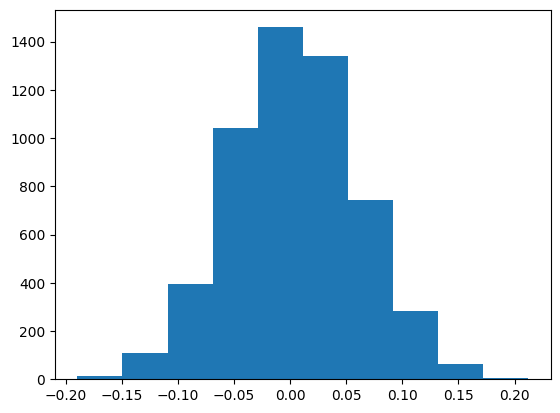

In [164]:
plt.hist(sample_triangle)

In [339]:
# check a random link expansion without rounding 
def link_exp(samples, coord_idx, N, unweighted):
    i = random.randint(1, N)
    print(i)
    shift = 0
    res = np.zeros((N, N))
    for k in range(N):
        for j in range(k):
            if j + 1 != i and k + 1 != i:
                cur = tuple(np.sort((i, j + 1, k + 1)))
                temp = samples[coord_idx[cur]] + shift
                res[j][k] = temp
                res[k][j] = temp
    res = np.delete(res, i - 1, axis = 0)
    res = np.delete(res, i - 1, axis = 1)
    ma = np.max(res)
    mi = np.min(res)
    thresh = vals[-1]
    res[res <= thresh] = 0
    if unweighted:
        res[res > thresh] = 1
    print('threahold val and number of neighbor with non-zero edge weight')
    print(thresh, np.sum(res > 0, axis = 1))
    d = np.sqrt(np.sum(res, axis = 1))
    index = (d > 0)
    print('normalization')
    print(d)
    print(res[d > 0][:, d > 0].shape)
    return 1/d[index][None, :] * res[index][:, index] * 1/d[index][:, None]
#     return (res > thresh).astype(int)

In [336]:
test1 = link_exp(sample_triangle, coord_idx, N, False)
#     d = 1/np.sqrt(np.sum(res, axis = 1))
#     return d[None, :] * res * d[:, None]
np.sort(1 - np.linalg.eigvals(test1))

16
threahold val and number of neighbor with non-zero edge weight
0.0031634822758008327 [23 10 11 20 13 23 10 11 29 18 24 16  9  8  8 28 19 18 19 15  9  8 21 17
  8 16 12 22 17 11 14 11]
normalization
[0.87281291 0.6777585  0.681404   0.81493104 0.65301421 0.87504448
 0.55245828 0.57901391 1.28991962 0.84260561 1.11125402 0.79402298
 0.52539437 0.50128923 0.49224157 1.42148442 0.92885317 0.88016552
 0.75506574 0.74729266 0.5842818  0.42529507 0.88357698 0.65923166
 0.44702599 0.7721625  0.63364256 0.92865971 0.75096318 0.58054242
 0.6577766  0.68491088]
(32, 32)


array([0.        , 0.60365149, 0.66294036, 0.69474921, 0.7546394 ,
       0.7852293 , 0.82481964, 0.82792077, 0.87680833, 0.89472653,
       0.9056996 , 0.93084379, 0.94687769, 0.9657783 , 0.99509594,
       1.00750211, 1.01577463, 1.05719925, 1.07718338, 1.11420698,
       1.11568948, 1.15275074, 1.17183366, 1.20280885, 1.21546244,
       1.23718384, 1.24870511, 1.28968795, 1.29507654, 1.34009113,
       1.37642977, 1.41263379])

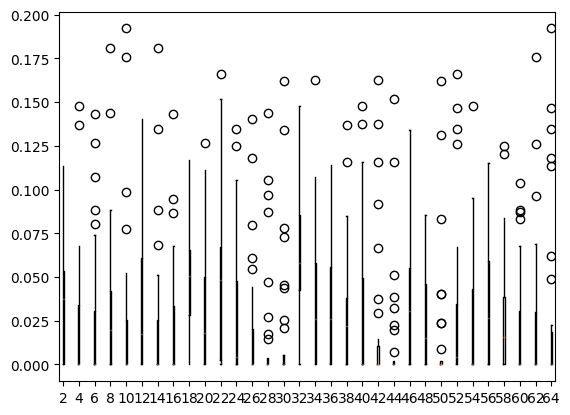

In [337]:
# for each vertex, look at it's neighbors val in normalied adj
i = 1
for r in test1:
    plt.boxplot(r, positions=[i * 2])
    i += 1

In [341]:
test1 = link_exp(sample_triangle, coord_idx, N, True)
#     d = 1/np.sqrt(np.sum(res, axis = 1))
#     return d[None, :] * res * d[:, None]
np.sort(1 - np.linalg.eigvals(test1))

7
threahold val and number of neighbor with non-zero edge weight
0.0031634822758008327 [ 9 11 25 23 11 15 17 11 17 19 16  8 17 18 10 14 15  5 10 21 19  9 15  8
  5 20 12 23 10 10  6  3]
normalization
[3.         3.31662479 5.         4.79583152 3.31662479 3.87298335
 4.12310563 3.31662479 4.12310563 4.35889894 4.         2.82842712
 4.12310563 4.24264069 3.16227766 3.74165739 3.87298335 2.23606798
 3.16227766 4.58257569 4.35889894 3.         3.87298335 2.82842712
 2.23606798 4.47213595 3.46410162 4.79583152 3.16227766 3.16227766
 2.44948974 1.73205081]
(32, 32)


array([-4.44089210e-16,  6.59053162e-01,  6.97606083e-01,  7.16794721e-01,
        7.51190039e-01,  7.77012050e-01,  8.13144416e-01,  8.49636681e-01,
        8.65150255e-01,  8.92259770e-01,  8.98765996e-01,  9.34259753e-01,
        9.75986188e-01,  9.89644815e-01,  9.93989899e-01,  1.02151833e+00,
        1.03520805e+00,  1.05052969e+00,  1.06941358e+00,  1.08363874e+00,
        1.12792062e+00,  1.16251831e+00,  1.16766355e+00,  1.18389669e+00,
        1.19647427e+00,  1.21321262e+00,  1.24497043e+00,  1.27715429e+00,
        1.29175409e+00,  1.32860205e+00,  1.35001821e+00,  1.38101265e+00])

In [327]:
theta = [i/N for i in range(N)]
x = [np.cos(i * 2 * np.pi) for i in theta]
y = [np.sin(i * 2 * np.pi) for i in theta]


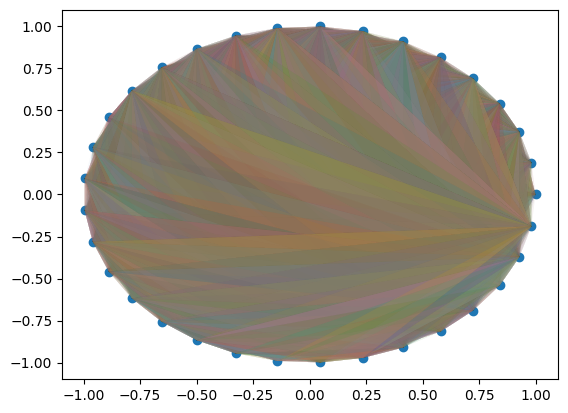

In [120]:
plt.scatter(x, y)
shift = np.median(sample_triangle)
for v in V:
    temp = sample_triangle[coord_idx[v]]
    if temp >= shift:
        plt.fill([x[i - 1] for i in v], [y[i - 1] for i in v], alpha = temp )
plt.show()